# Visualization

### HOG Feature

/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


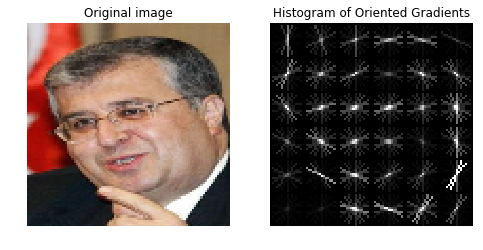

In [14]:
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import exposure


image_path, label = open('data/train.txt').readlines()[0].split()

image = cv2.imread(image_path)
image = cv2.resize(image, (96, 96))
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex='all', sharey='all')
ax1.axis('off')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # original image is BGR
ax1.set_title('Original image')

fd, hog_image = hog(
    image_grey,
    visualise=True,
    pixels_per_cell=(16, 16),
    cells_per_block=(2, 2),
)

### Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap='gray')
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

### SVM Support Vectors

In [8]:
from common.util import get_data_and_labels
from sklearn.svm import SVC

X_train, y_train = get_data_and_labels('data/train.txt')

model = SVC(kernel='linear', verbose=True)
model.fit(X_train, y_train)

X_test, y_test = get_data_and_labels('data/test.txt')
y_pred = model.predict(X_test)

getting all data and labels from data/train.txt


  0%|          | 0/20680 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
100%|██████████| 20680/20680 [01:00<00:00, 339.54it/s]


done in 61.9 seconds


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibSVM]getting all data and labels from data/test.txt


100%|██████████| 5203/5203 [00:14<00:00, 359.17it/s]


done in 15.5 seconds


In [11]:
import numpy as np
y_pred = y_pred.reshape(y_test.shape)
print('acc:%.4f' % np.mean(y_pred == y_test))

acc:0.9767


In [47]:
origin, labels = get_data_and_labels('data/train.txt', do_hog=False)
origin.shape

getting all data and labels from data/train.txt


100%|██████████| 20680/20680 [00:27<00:00, 756.58it/s]


done in 28.3 seconds


(20680, 96, 96, 3)

In [42]:
SVs = origin[model.support_[100:]]
SVs.shape

(100, 96, 96, 3)

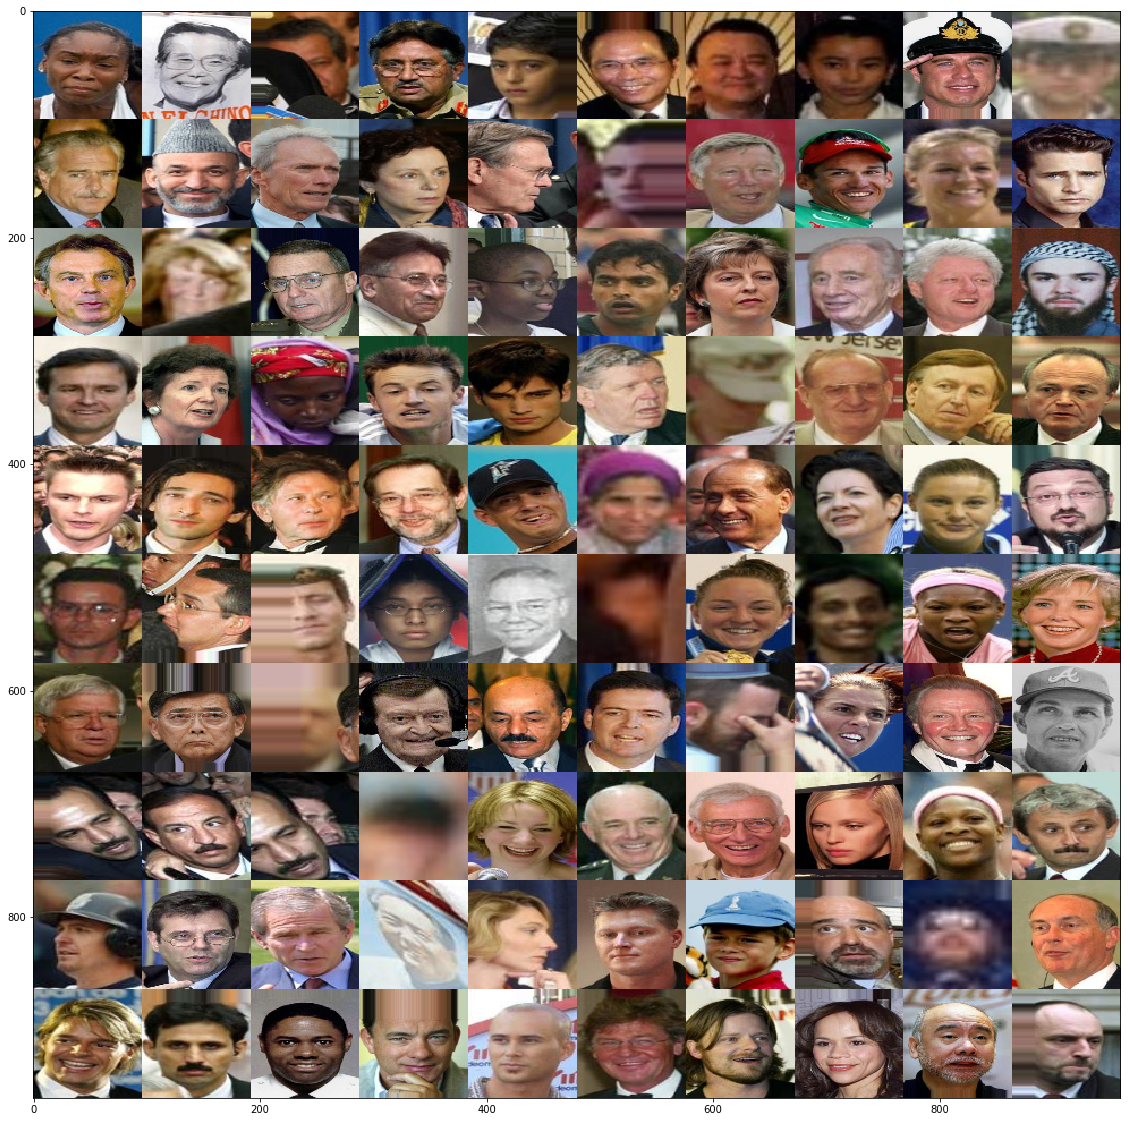

In [44]:
pos_SVs = origin[model.support_[:100]]
combined = np.zeros((10*96, 10*96, 3), dtype=int)

for i in range(10):
    for j in range(10):
        combined[i*96:(i+1)*96, j*96:(j+1)*96] = cv2.cvtColor(pos_SVs[i*10 + j], cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20, 20))  
ax = fig.add_subplot(111)
ax.imshow(combined)
plt.show()

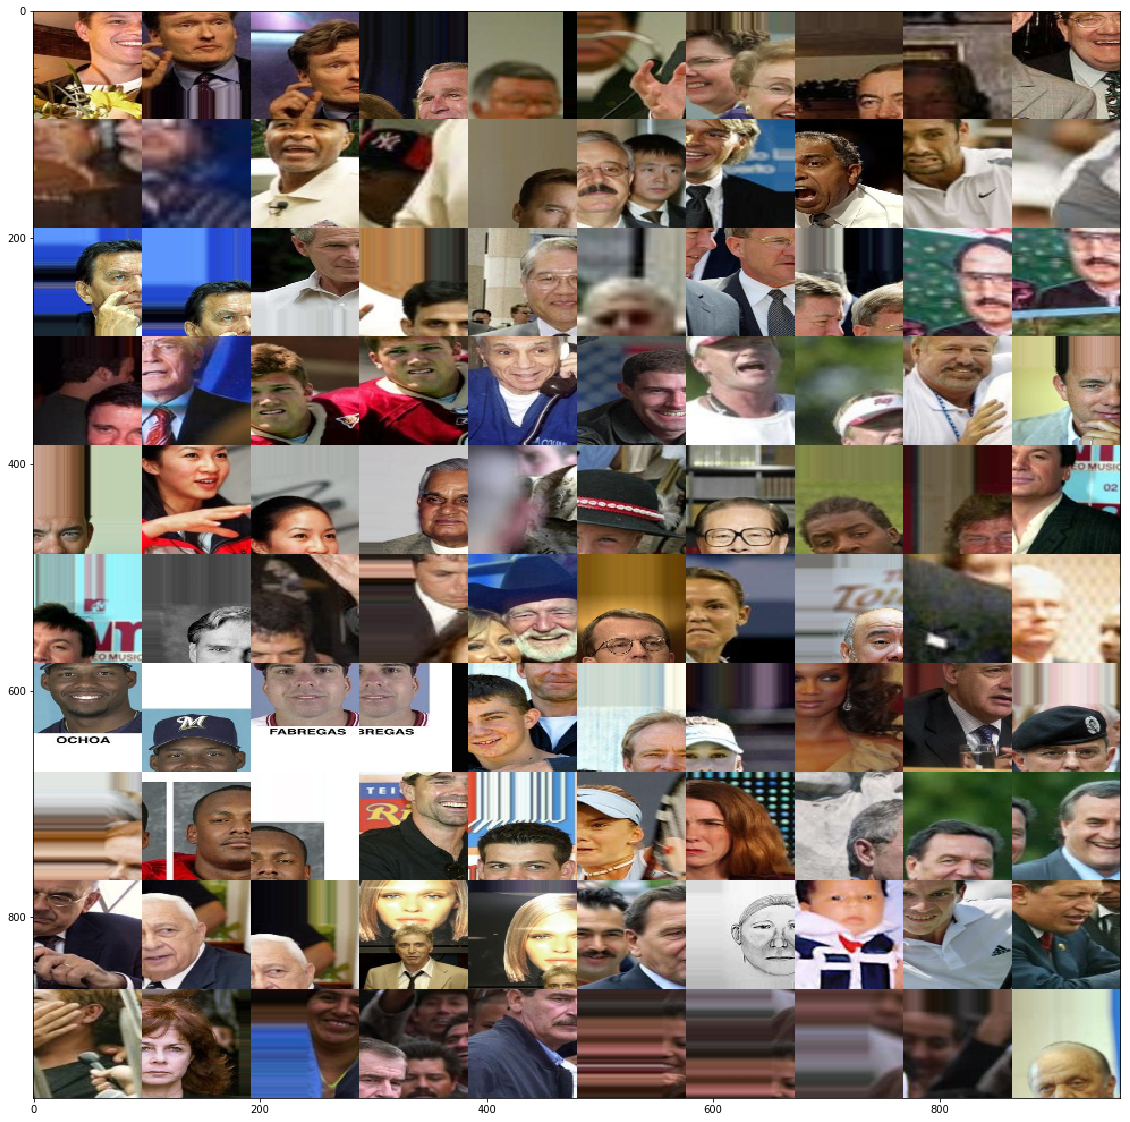

In [43]:
neg_SVs = origin[model.support_[-100:]]
combined = np.zeros((10*96, 10*96, 3), dtype=int)

for i in range(10):
    for j in range(10):
        combined[i*96:(i+1)*96, j*96:(j+1)*96] = cv2.cvtColor(neg_SVs[i*10 + j], cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20, 20))  
ax = fig.add_subplot(111)
ax.imshow(combined)
plt.show()

In [56]:
from sklearn.decomposition import PCA
pca = PCA(2)

X_projected = pca.fit_transform(X_train)

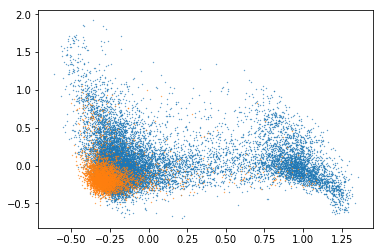

In [73]:
pos = X_projected[np.squeeze(y_train==0)]
neg = X_projected[np.squeeze(y_train==1)]

plt.scatter(pos[:, 0], pos[:, 1], s=0.1)
plt.scatter(neg[:, 0], neg[:, 1], s=0.1)
plt.show()